## Preprocessing

In [25]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [26]:
# see the data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
application_df['USE_CASE'].value_counts()

USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

# use apply function instead of the for loop
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].apply(lambda x: 'Other' if x in application_types_to_replace else x)

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
count_s = application_df['CLASSIFICATION'].value_counts()
count_s[count_s > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_keep = ['C1000', 'C2000', 'C1200', 'C3000', 'C2100']

# Replace in dataframe
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].apply(lambda x: 'Other' if x not in classifications_to_keep else x)

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
cat_columns = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
#print("Category Columns:", application_df[cat_columns].nunique())

enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(application_df[cat_columns])
enc_columns = enc.get_feature_names_out().tolist()

encode_df = pd.DataFrame(enc_data, columns=enc_columns)
#display(encode_df.head())

# now lets merge the into the application dataframe then drop original columns
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(columns=cat_columns)

print(application_df.columns)

application_df.head()

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

# show the class balance
y.value_counts(normalize=True)

IS_SUCCESSFUL
1    0.532406
0    0.467594
Name: proportion, dtype: float64

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the NN Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 = number_input_features*4
hidden_nodes_layer2 = number_input_features

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# add a drop out layer
nn.add(tf.keras.layers.Dropout(0.2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 172)               7568      
                                                                 
 dropout (Dropout)           (None, 172)               0         
                                                                 
 dense_1 (Dense)             (None, 43)                7439      
                                                                 
 dense_2 (Dense)             (None, 1)                 44        
                                                                 
Total params: 15,051
Trainable params: 15,051
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

fit_model = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=64, callbacks=[earlyStop])
#fit_model = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=64)

Epoch 1/100
402/402 [==============================] - 3s 3ms/step - loss: 0.5771 - accuracy: 0.7171
Epoch 2/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5607 - accuracy: 0.7275
Epoch 3/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5549 - accuracy: 0.7286
Epoch 4/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5537 - accuracy: 0.7295
Epoch 5/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5521 - accuracy: 0.7298
Epoch 6/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5512 - accuracy: 0.7307
Epoch 7/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5513 - accuracy: 0.7322
Epoch 8/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5482 - accuracy: 0.7306
Epoch 9/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5486 - accuracy: 0.7318
Epoch 10/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5485 - accura

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5530 - accuracy: 0.7308 - 565ms/epoch - 2ms/step
Loss: 0.5529584884643555, Accuracy: 0.7308454513549805


In [24]:
#Making predictions on the test set and print out classification report
threshold = 0.5

predictions = nn.predict(X_test_scaled)
predictions = predictions > threshold

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Base Model Accuracy:", accuracy)
print("\nClassification Report:")

print(classification_report(y_test, predictions))

268/268 [==============================] - 0s 926us/step
Base Model Accuracy: 0.7308454810495627

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.69      4045
           1       0.72      0.80      0.76      4530

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575



<Axes: >

<Axes: >

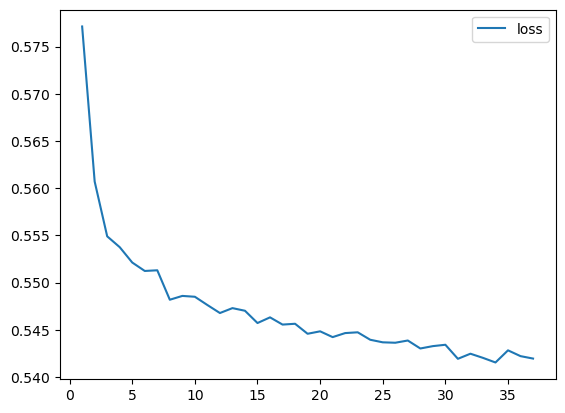

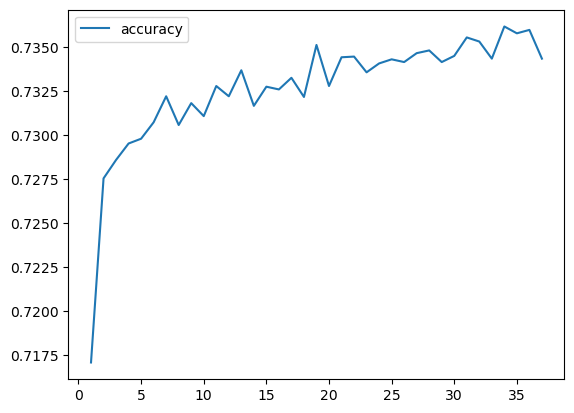

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss and 
display(history_df.plot(y="loss"))
display(history_df.plot(y="accuracy"))

In [23]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')